In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, InputLayer,Embedding,SpatialDropout1D
from tensorflow.keras.callbacks import TensorBoard,EarlyStopping
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
import json

In [62]:
df = pd.read_csv('Data/Confirmed_Cases_US_Vaccinated_NewDataset.csv').drop(columns=['Unnamed: 0'])
df

,ObservationDate,Confirmed,People_Fully_Vaccinated
0,2020-01-22,1,0
1,2020-01-23,1,0
2,2020-01-24,2,0
3,2020-01-25,2,0
4,2020-01-26,5,0
...,...,...,...
462,2021-04-28,32230850,199426393
463,2021-04-29,32289049,202713598
464,2021-04-30,32346971,206220484
465,2021-05-01,32392274,210278776


In [63]:
## Use the data from April to May as test
start_index = df[df['ObservationDate']=='2021-04-01'].index
start_date = start_index[0]
start_date

435

In [64]:
x = np.arange(0, start_date).reshape(-1,1)
x

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [79]:
end_index = df[df['ObservationDate']=='2021-05-02'].index
end_date = end_index[0]
end_date

466

In [ ]:
x_test = np.arange(start_date, end_date + 1)
x_test = x_test.reshape(-1,1)
x_test

In [110]:
x_test = np.arange(start_date, end_date + 1)
x_test

array([435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447,
       448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460,
       461, 462, 463, 464, 465, 466])

In [111]:
x_test.shape

(32,)

In [112]:
y_v_test = df.iloc[start_date:,-1]
y_v_test

435    114583082
436    118422715
437    122216549
438    125385077
439    127355746
440    128602626
441    131454029
442    135064895
443    139105415
444    144145651
445    148071014
446    150979224
447    153501691
448    156266663
449    159943303
450    164207620
451    167974595
452    171603046
453    173830334
454    175551679
455    178322476
456    181665228
457    185563352
458    189409819
459    192837765
460    195081051
461    196802025
462    199426393
463    202713598
464    206220484
465    210278776
466    213016060
Name: People_Fully_Vaccinated, dtype: int64

In [113]:
y_v_test.shape

(32,)

In [114]:
y_v_train = df.iloc[:start_date,-1]
y_v_train

0              0
1              0
2              0
3              0
4              0
         ...    
430    102491174
431    105451667
432    107528783
433    109153459
434    111562791
Name: People_Fully_Vaccinated, Length: 435, dtype: int64

In [115]:
y_v_train.unique

<bound method Series.unique of 0              0
1              0
2              0
3              0
4              0
         ...    
430    102491174
431    105451667
432    107528783
433    109153459
434    111562791
Name: People_Fully_Vaccinated, Length: 435, dtype: int64>

In [116]:
y_v_test.shape

(32,)

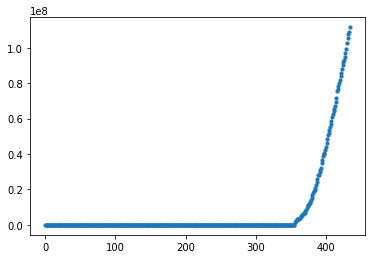

In [117]:
plt.scatter(x, y_v_train, s=10)

In [118]:
activation="sigmoid"
loss="binary_crossentropy"
metrics=['accuracy']
optimizer='adam'
epochs=20

In [119]:
TFmodel= Sequential()
TFmodel.add(Embedding(30000, 64, input_length=1))
TFmodel.add(SpatialDropout1D(0.2))
TFmodel.add(Dense(1, activation=activation))
TFmodel.compile(loss=loss, metrics=metrics, optimizer=optimizer)

In [120]:
tensorboard = TensorBoard(log_dir='logs')
earlystopping = EarlyStopping(mode='min', patience=3, restore_best_weights=True)
history = TFmodel.fit(x,y_v_train,epochs=epochs, batch_size=64, callbacks=[tensorboard,earlystopping], validation_data=(x_test, y_v_test),)


Epoch 1/20
7/7 [==============================] - 1s 55ms/step - loss: 5787.0930 - accuracy: 0.4381 - val_loss: -2693304.0000 - val_accuracy: 0.0000e+00
Epoch 2/20
7/7 [==============================] - 0s 16ms/step - loss: -246863.4141 - accuracy: 0.5018 - val_loss: -3773185.5000 - val_accuracy: 0.0000e+00
Epoch 3/20
7/7 [==============================] - 0s 15ms/step - loss: -419544.6172 - accuracy: 0.6238 - val_loss: -4872207.5000 - val_accuracy: 0.0000e+00
Epoch 4/20
7/7 [==============================] - 0s 18ms/step - loss: -694617.7539 - accuracy: 0.6807 - val_loss: -5966866.5000 - val_accuracy: 0.0000e+00
Epoch 5/20
7/7 [==============================] - 0s 16ms/step - loss: -814990.2812 - accuracy: 0.7569 - val_loss: -7019787.5000 - val_accuracy: 0.0000e+00
Epoch 6/20
7/7 [==============================] - 0s 16ms/step - loss: -1283232.5312 - accuracy: 0.7684 - val_loss: -8132437.0000 - val_accuracy: 0.0000e+00
Epoch 7/20
7/7 [==============================] - 0s 17ms/step - l

In [121]:
y_v_pred = TFmodel.predict(x_test)
y_v_pred

array([[[0.5459283 ]],

       [[0.54007334]],

       [[0.5093025 ]],

       [[0.54708046]],

       [[0.54537547]],

       [[0.51901764]],

       [[0.5336424 ]],

       [[0.54472554]],

       [[0.54721475]],

       [[0.5396384 ]],

       [[0.56064177]],

       [[0.54132324]],

       [[0.5031915 ]],

       [[0.5179194 ]],

       [[0.5186574 ]],

       [[0.52603334]],

       [[0.51049685]],

       [[0.53950125]],

       [[0.5722798 ]],

       [[0.51265603]],

       [[0.5328017 ]],

       [[0.5330974 ]],

       [[0.53889716]],

       [[0.5141702 ]],

       [[0.5358558 ]],

       [[0.5543966 ]],

       [[0.54733104]],

       [[0.5250377 ]],

       [[0.5143158 ]],

       [[0.5452962 ]],

       [[0.5566723 ]],

       [[0.5739336 ]]], dtype=float32)

In [125]:
pred_v = []
pred_v = [elem[0] for elem in y_v_pred]
pred_v

[array([0.5459283], dtype=float32),
 array([0.54007334], dtype=float32),
 array([0.5093025], dtype=float32),
 array([0.54708046], dtype=float32),
 array([0.54537547], dtype=float32),
 array([0.51901764], dtype=float32),
 array([0.5336424], dtype=float32),
 array([0.54472554], dtype=float32),
 array([0.54721475], dtype=float32),
 array([0.5396384], dtype=float32),
 array([0.56064177], dtype=float32),
 array([0.54132324], dtype=float32),
 array([0.5031915], dtype=float32),
 array([0.5179194], dtype=float32),
 array([0.5186574], dtype=float32),
 array([0.52603334], dtype=float32),
 array([0.51049685], dtype=float32),
 array([0.53950125], dtype=float32),
 array([0.5722798], dtype=float32),
 array([0.51265603], dtype=float32),
 array([0.5328017], dtype=float32),
 array([0.5330974], dtype=float32),
 array([0.53889716], dtype=float32),
 array([0.5141702], dtype=float32),
 array([0.5358558], dtype=float32),
 array([0.5543966], dtype=float32),
 array([0.54733104], dtype=float32),
 array([0.5250

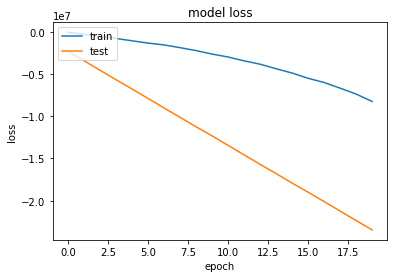

In [97]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

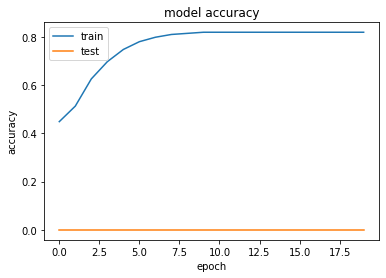

In [127]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

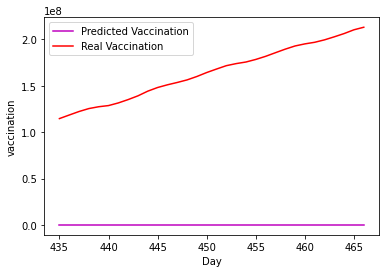

In [126]:
plt.plot(x_test, pred_v, color='m', label="Predicted Vaccination")
plt.plot(x_test, y_v_test, color='r',label="Real Vaccination")
plt.legend()
plt.xlabel("Day")
plt.ylabel("vaccination")
plt.show()

In [100]:
x_test.shape

(32, 1)

In [101]:
y_v_pred.shape

(32, 1, 1)

In [104]:
x_test.shape

(32, 1)

In [ ]:
y_c_test = df.iloc[start_date:,-2]
y_c_test

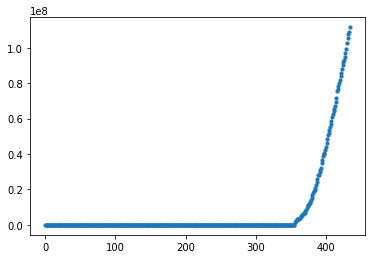

In [93]:
plt.scatter(x, y_v_train, s=10)

In [94]:
y_v_test = df.iloc[102:,-1]
y_v_test

102            0
103            0
104            0
105            0
106            0
         ...    
462    199426393
463    202713598
464    206220484
465    210278776
466    213016060
Name: People_Fully_Vaccinated, Length: 365, dtype: int64

ValueError: x and y must have same first dimension, but have shapes (31, 1) and (2, 1, 1)

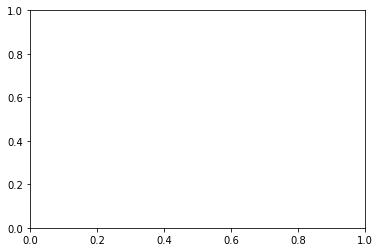

In [95]:
plt.plot(x_pred, y_v_pred, color='m', label="Predicted Vaccination")
plt.plot(x_pred, y_v_test, color='r',label="Real Vaccination")
#plt.title("Amount of " + model_name + " in each day")
plt.legend()
plt.xlabel("Day")
plt.ylabel("vaccination")
plt.show()

In [ ]:
y_c_train = df.iloc[:102,1]
vaccination = df.iloc[:102,-1]
vaccination

In [ ]:
x_c_train = np.vstack((np.array(df.iloc[:102,:].index.values.tolist()), vaccination)).T
x_c_train

In [ ]:
plt.scatter(x,y_c_train,s=10)

In [ ]:
neural_net_model = NeuralNetModel(model_config["model_name"])
neural_net_model.train(x_c_train, y_c_train, model_config["model"])

In [ ]:
x_c_test = np.vstack((np.array(list), y_v_pred)).T
x_c_test

In [ ]:
y_c_pred = neural_net_model.get_predictions(x_c_test)
y_c_pred

In [ ]:
x_c_test_real = np.vstack((np.array(list), np.array(y_v_test.tolist()))).T
x_c_test_real

In [ ]:
y_c_pred_real = neural_net_model.get_predictions(x_c_test_real)
y_c_pred_real

In [ ]:
y_c_test = df.iloc[102:,1]
y_c_test

In [ ]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.plot(x_pred, y_c_test, color='r', label="Real confirmed cases")
plt.plot(x_pred,y_c_pred,color='b', label="predicted confirmed cases")
#plt.title("Amount of " + model_name + " in each day")
plt.legend()
plt.xlabel("Day")
plt.ylabel("Cases")

plt.subplot(1,2,2)
plt.plot(x_pred, y_c_test, color='r', label="Real confirmed cases")
plt.plot(x_pred,y_c_pred_real,color='b', label="predicted confirmed cases with real vaccination")
#plt.title("Amount of " + model_name + " in each day")
plt.legend()
plt.xlabel("Day")
plt.ylabel("Cases")

plt.show()

In [ ]:
plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
plt.plot(x_pred, y_v_pred, color='r', label="predicted vaccination")
plt.plot(x_pred,y_c_pred,color='b', label="predicted confirmed cases")
#plt.title("Amount of " + model_name + " in each day")
plt.legend()
plt.xlabel("Day")
plt.ylabel("Cases/Vacciantions")

plt.subplot(1,3,2)
plt.plot(x_pred, y_v_test, color='r', label="real vaccination")
plt.plot(x_pred,y_c_test,color='b', label="real confirmed cases")
#plt.title("Amount of " + model_name + " in each day")
plt.legend()
plt.xlabel("Day")
plt.ylabel("Cases/Vacciantions")

plt.subplot(1,3,3)
plt.plot(x_pred, y_v_test, color='r', label="real vaccination")
plt.plot(x_pred,y_c_pred_real,color='b', label="predicted confirmed cases with real vaccination")
#plt.title("Amount of " + model_name + " in each day")
plt.legend()
plt.xlabel("Day")
plt.ylabel("Cases/Vacciantions")

plt.show()